# Demo: Diskrete Kosinus-Transformation

Abkürzung: DCT = Discrete Cosine Transformation

## Bibliotheken

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import cv2 as cv

## Eindimensionale DCT

### Kosinusfunktionen im Intervall $[0,\pi]$

In [2]:
Farbe = ['red', 'green', 'turquoise', 'blue', 'violet']

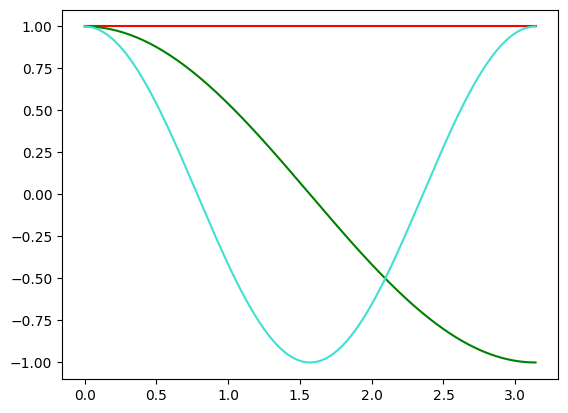

In [3]:
def KosinusKurven (N):
    x = np.linspace (0, np.pi, 1001)
    for n in range (N):
        pl.plot (x, np.cos (n * x), color = Farbe [n])

KosinusKurven (3)

### Diskrete Kosinusfunktionen

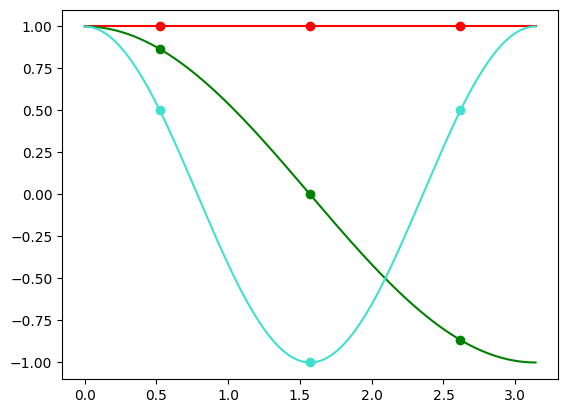

In [4]:
def KosinusKurvenPunkte (N):
    x1 = np.linspace (0, np.pi, 1001)
    x2 = (2 * np.arange (N) + 1) / (2 * N) * np.pi
    for n in range (N):
        pl.plot (x1, np.cos (n * x1), color = Farbe [n])
        pl.plot (x2, np.cos (n * x2), 'o', color = Farbe [n])

KosinusKurvenPunkte (3)

### Kosinustransformation als Matrix

#### Stützstellen

In [5]:
def DctArgs (N):
    jj = 2 * np.arange (N) + 1
    tt = jj / (2 * N)
    xx = np.pi * tt
    return xx

DctArgs (2)

array([0.78539816, 2.35619449])

#### Eine Zeile

In [6]:
def DctZeile (N, n):
    xx = DctArgs (N)
    return np.cos (n * xx)

print (DctZeile (2, 0))
print (DctZeile (2, 1))

[1. 1.]
[ 0.70710678 -0.70710678]


#### Vollständige Matrix

In [7]:
def DctMatrix (N):
    C = np.zeros ((N, N))
    for n in range (N):
        C [n, :] = DctZeile (N, n)
    C /= np.sqrt (N); C [1:, :] *= np.sqrt (2)
    return C

M = DctMatrix (3)
print (M)

[[ 5.77350269e-01  5.77350269e-01  5.77350269e-01]
 [ 7.07106781e-01  4.99959962e-17 -7.07106781e-01]
 [ 4.08248290e-01 -8.16496581e-01  4.08248290e-01]]


#### Orthogonalität

In [8]:
print (M.T @ M)

[[ 1.00000000e+00 -3.46795453e-17  7.15328659e-18]
 [-3.46795453e-17  1.00000000e+00 -1.45701848e-16]
 [ 7.15328659e-18 -1.45701848e-16  1.00000000e+00]]


### Transformation angewandt auf eine diskretisierte Funktion

[ 0.01547247  1.46581383  0.09960225 -0.0258066 ]


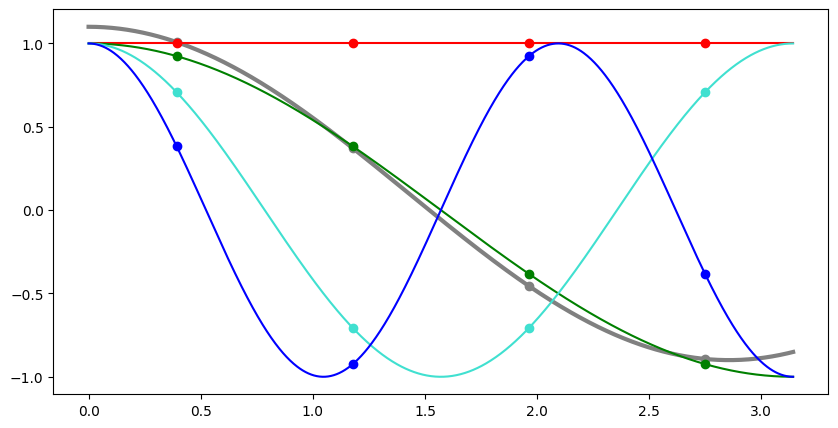

In [9]:
def Test (f, N):
    x = DctArgs (N)
    y = f (x)
    C = DctMatrix (N)
    print (C @ y)
    
    xx = np.linspace (0, np.pi, 1001)
    pl.figure (figsize = (10, 5))
    pl.plot (xx, f (xx), color = 'gray', linewidth = 3)
    pl.plot (x, y, 'o', color = 'gray')
    KosinusKurvenPunkte (N)

Test (lambda x: np.cos (1.1 * x) + 0.1, 4)

## Zweidimensionale DCT

### Eine Basisfunktion aus einem Bild mit einem hellen Pixel

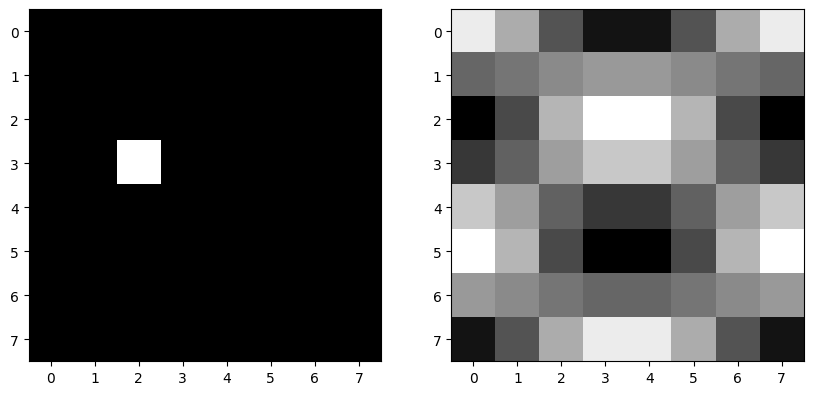

In [10]:
def EinPixelBild (N, k, l):
    X = np.zeros ((N, N))
    X [k, l] = 1
    return X

def EineBasis (N, k, l):
    X = EinPixelBild (N, k, l)
    C = DctMatrix (N)
    pl.figure (figsize = (10, 5))
    pl.subplot (1, 2, 1); pl.imshow (X, cmap = 'gray')
    pl.subplot (1, 2, 2); pl.imshow (C.T @ X @ C, cmap = 'gray')
    return X

t = EineBasis (8, 3, 2)

### Alle Basisfunktionen

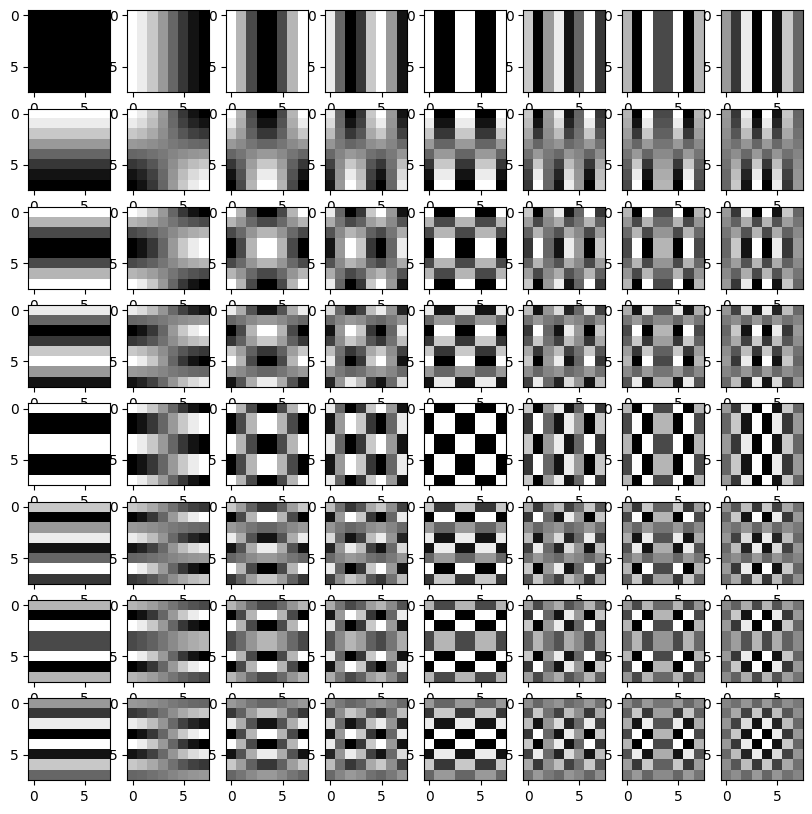

In [36]:
def AlleBasen (N):
    i = 0
    C = DctMatrix (N)
    for j in range (N):
        for k in range (N):
            i = i + 1
            pl.subplot (N, N, i)
            X = EinPixelBild (N, j, k)
            pl.imshow (C.T @ X @ C, cmap = 'gray')

pl.figure (figsize = (10, 10))
AlleBasen (8)

## Anwendung: Bildkompression

### Bildquelle

https://breckon.org/fundipbook/materials/

### Bild einlesen und darstellen

In [11]:
X = cv.imread ('Images/autumn.png')
X = cv.cvtColor (X, cv.COLOR_BGR2GRAY)

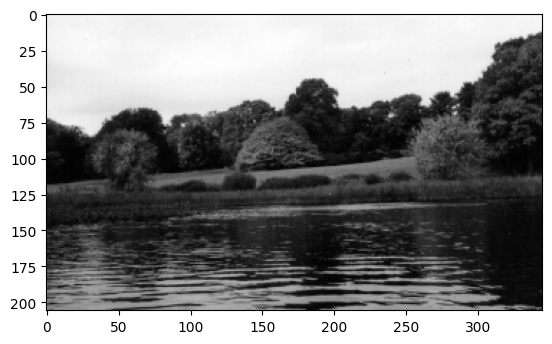

In [12]:
pl.imshow (X, cmap = 'gray')

### Information zu einem Bild ausgeben

In [13]:
def info (im):
    print ('shape:', im.shape, '/ min:', np.min (im), '/ max:', np.max (im))

In [14]:
info (X)

shape: (206, 345) / min: 19 / max: 239


### Intensitäten "verschieben"

In [15]:
Min = np.min (X)
Max = np.max (X)
X1 = 1.0 * (X - Min) / (Max - Min) - 0.0
info (X1)

shape: (206, 345) / min: 0.0 / max: 1.0


### Bild in den Frequenzraum transformieren

#### Transformationsmatrizen

In [16]:
M, N = X1.shape
CM = DctMatrix (M)
CN = DctMatrix (N)
info (CM)
info (CN)

shape: (206, 206) / min: -0.09853292781642932 / max: 0.09853292781642932
shape: (345, 345) / min: -0.07613869876268811 / max: 0.07613869876268811


#### Transformation durchführen

In [17]:
Y1 = CM @ X1 @ CN.T
info (Y1)

shape: (206, 345) / min: -17.615046850260164 / max: 112.36475786088761


#### Test: Rücktransformation

In [18]:
tmp = CM.T @ Y1 @ CN
info (tmp)

shape: (206, 345) / min: -9.381793458992384e-15 / max: 1.000000000000031


#### Hohe Frequenzen "abschneiden"

In [19]:
Y2 = np.copy (Y1)
Y2 [30:, 30:] = 0
info (Y2)

shape: (206, 345) / min: -17.615046850260164 / max: 112.36475786088761


#### Bild mit abgeschnittenen Frequenzen rücktransformieren

In [20]:
Z2 = CM.T @ Y2 @ CN
info (X1)
info (Z2)

shape: (206, 345) / min: 0.0 / max: 1.0
shape: (206, 345) / min: -0.03986810830455131 / max: 1.060799374418526


#### Ursprüngliches und komprimiertes Bild darstellen

shape: (206, 345) / min: 0.0 / max: 1.0
shape: (206, 345) / min: -0.03986810830455131 / max: 1.060799374418526
shape: (206, 345) / min: -0.30652253195008605 / max: 0.34711150088432213


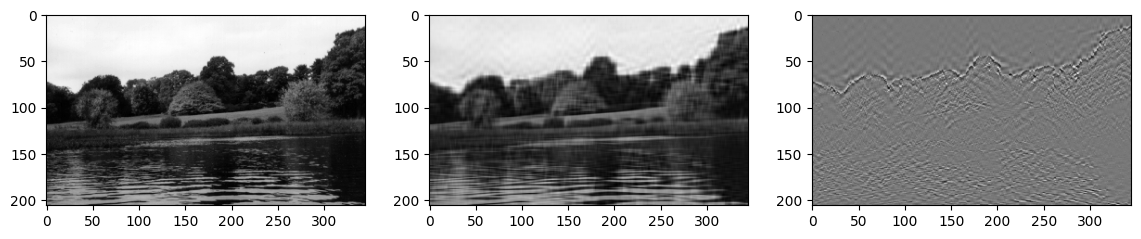

In [21]:
pl.figure (figsize = (14, 7))
pl.subplot (1, 3, 1); pl.imshow (X1, cmap = 'gray')
info (X1)
pl.subplot (1, 3, 2); pl.imshow (Z2, cmap = 'gray')
info (Z2)
pl.subplot (1, 3, 3); pl.imshow (X1 - Z2, cmap = 'gray')
info (X1 - Z2)

shape: (206, 345) / min: 0.0 / max: 1.0


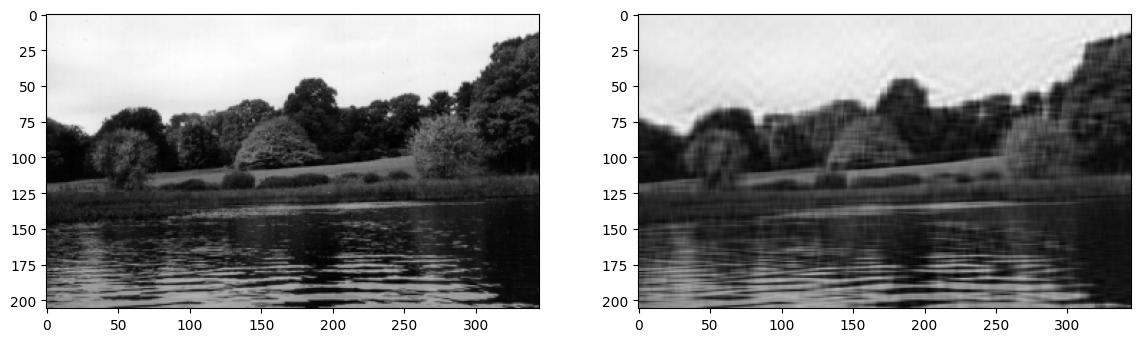

In [22]:
pl.figure (figsize = (14, 7))
pl.subplot (1, 2, 1); pl.imshow (X1, cmap = 'gray')
info (X1)
pl.subplot (1, 2, 2); pl.imshow (Z2, cmap = 'gray')